## Objective: 
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('zoo.csv')
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


#### Analyze the data using visualizations

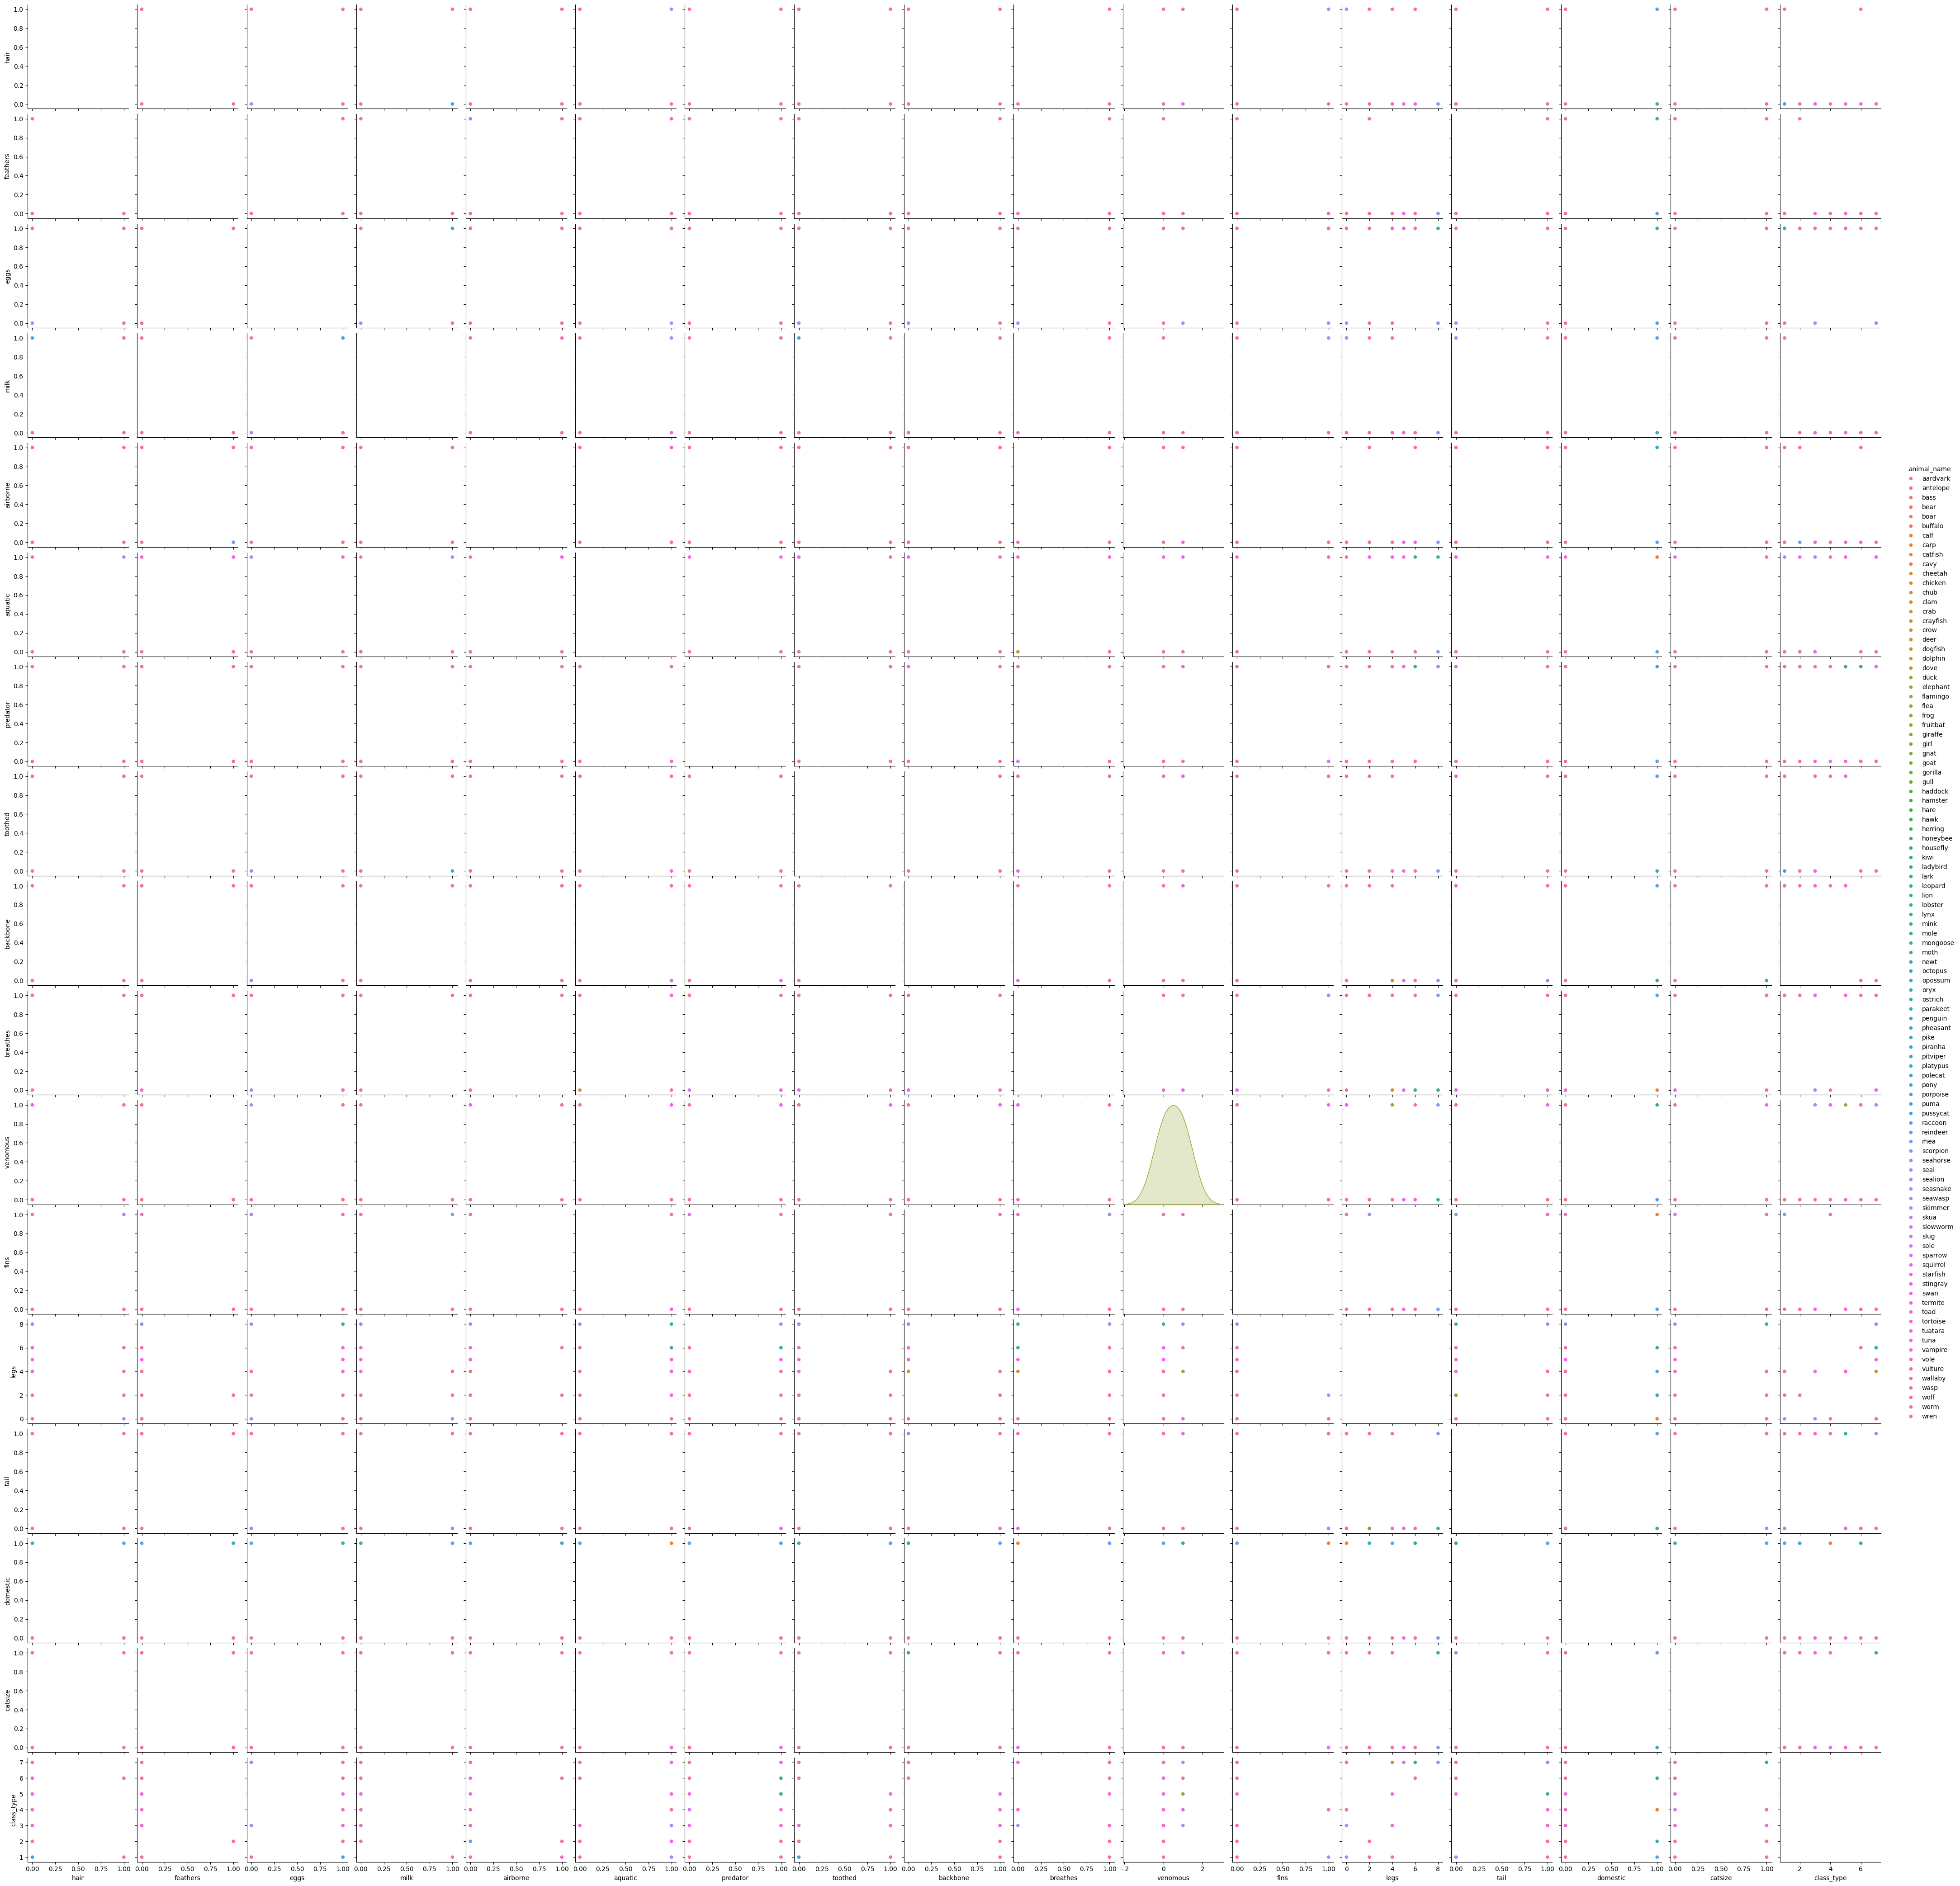

In [4]:
sns.pairplot(df, hue='animal_name')  
plt.show()

#### Check for missing values

In [5]:
df.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

#### Detecting and handling outliers (example: using Z-score)

In [6]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df = df[(z_scores < 3).all(axis=1)]

#### Standardize the features for KNN

In [24]:
scaler = StandardScaler()
X = df.drop('animal_name', axis=1)  
y = df['animal_name']
X_scaled = scaler.fit_transform(X)

#### Split the dataset into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Implement the K-Nearest Neighbors algorithm
#### Choosing the best value for K

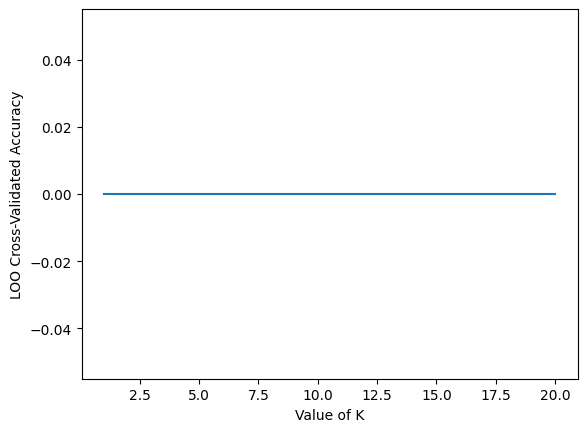

Optimal K: 1


In [10]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=loo).mean() for k in k_values]

# Plot and find the optimal K as before
plt.plot(k_values, cv_scores)
plt.xlabel('Value of K')
plt.ylabel('LOO Cross-Validated Accuracy')
plt.show()

best_k = k_values[np.argmax(cv_scores)]
print("Optimal K:", best_k)


#### Train the model with the optimal K

In [25]:
knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

#### Evaluate the classifier's performance

In [26]:
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

    aardvark       0.00      0.00      0.00       1.0
        bear       0.00      0.00      0.00       0.0
        boar       0.00      0.00      0.00       1.0
     buffalo       0.00      0.00      0.00       0.0
     catfish       0.00      0.00      0.00       0.0
     cheetah       0.00      0.00      0.00       1.0
     chicken       0.00      0.00      0.00       0.0
        chub       0.00      0.00      0.00       1.0
    crayfish       0.00      0.00      0.00       0.0
     dogfish       0.00      0.00      0.00       1.0
    elephant       0.00      0.00      0.00       1.0
    fruitbat       0.00      0.00      0.00       1.0
        girl       0.00      0.00      0.00       1.0
        gnat       0.00      0.00      0.00       0.0
        goat       0.00      0.00      0.00       0.0
        hare       0.00      0.00      0.00       1.0
 

#### Visualize the decision boundaries
#### Reduce the features to two dimensions using PCA for visualization purposes

In [27]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Create a mesh grid for the decision boundary

In [28]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [15]:
# Predict on the mesh grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#### Plot decision boundaries and training points

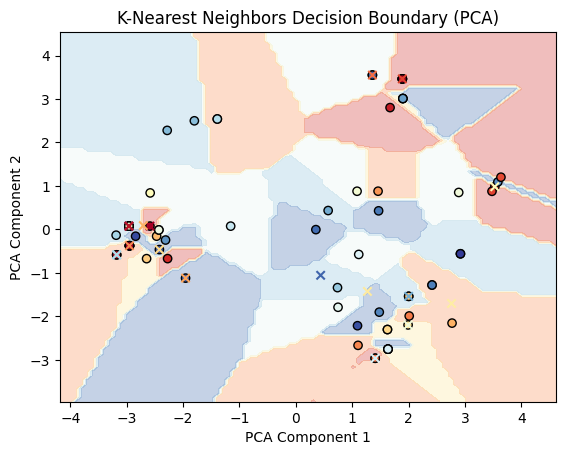

In [23]:
# Combine y_train and y_test temporarily to fit the LabelEncoder
y_combined = pd.concat([y_train, y_test])

# Initialize and fit LabelEncoder on combined labels
le = LabelEncoder()
le.fit(y_combined)

# Encode y_train and y_test based on all labels
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

# Re-train the KNN model with the encoded labels
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train_encoded)

# Predict on the mesh grid and reshape for plotting
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_encoded, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_encoded, edgecolor='k', marker='x', cmap=plt.cm.RdYlBu)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Nearest Neighbors Decision Boundary (PCA)')
plt.show()
